In [153]:
# Do this once
#import bokeh
#bokeh.sampledata.download()

from math import *
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point, Polygon, MultiPolygon,MultiLineString
from bokeh.sampledata.us_counties import data as counties
import westernintnet


In [154]:
# After installing, data are in C:\Users\mlamherr\AppData\Local\Continuum\anaconda3\Lib\site-packages\westernintnet\data
wecc = westernintnet.WesternIntNet()

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Load solar data
Load wind data
Load hydro data
Load demand data
Done loading


In [155]:
wecc.genbus_aux

,BusNum,GenID,GenStatus,GenVoltSet,GenRegNum,GenRMPCT,GenAGCAble,GenParFac,GenMWSetPoint,GenMWMax,...,AllLabels,GenUnitType,GenTotalFixedCosts,GenCostModel,GenFuelType,GenFuelCost,GenFixedCost,GenIOD,GenIOC,GenIOB
0,10683,1,Open,1.046445,10680,100,"NO,",159.270004,0.000000,159.270000,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
1,10684,1,Closed,1.046445,10680,100,"NO,",159.266663,85.287565,159.266663,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
2,10685,1,Closed,1.046445,10680,100,"NO,",159.266663,138.645494,159.266663,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
3,10686,1,Open,1.046445,10680,100,"NO,",159.266663,115.540326,159.266663,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
4,10687,1,Closed,1.046445,10680,100,"NO,",159.266663,120.630002,159.266663,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
5,10688,1,Closed,1.046445,10680,100,"NO,",159.266663,109.927619,159.266663,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
6,10689,1,Closed,1.053539,10681,100,"NO,",12.900000,9.015400,12.899999,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
7,10691,1,Closed,1.050000,10690,100,"NO,",98.900002,59.721959,98.900002,...,NaN,"UN,(Unknown)",0.000000,Cubic,Wind,0.000000,0.000000,0,0.000000,0.000000
8,10694,1,Closed,1.044006,10693,100,"NO,",35.000000,23.015119,34.999999,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000
9,10695,1,Closed,1.044006,10693,100,"NO,",35.000000,25.548464,34.999999,...,NaN,"UN,(Unknown)",0.000000,Cubic,Hydro,0.000000,0.000000,0,0.000000,0.000000


In [156]:
wecc.read_bus()

Loading bus


In [157]:
# Calculate line lenght
#def greatCircleDistance(lat1, lon1, lat2, lon2):
#    R = 6371000
#    def haversin(x):
#        return sin(x/2)**2 
#    return 2*R * asin(sqrt(
#          haversin(lat2-lat1) +
#          cos(lat1) * cos(lat2) * haversin(lon2-lon1)))


In [158]:
# Calculate line lenght
def haversine(coord1: object, coord2: object):
    import math

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    return km
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")

In [159]:
#original df
wecc.branches.columns

Index(['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio',
       'angle', 'status', 'angmin', 'angmax', 'Pf', 'Qf', 'Pt', 'Qt', 'mu_Sf',
       'mu_St', 'mu_angmin', 'mu_angmax', 'from_lat', 'from_lon', 'to_lat',
       'to_lon'],
      dtype='object')

In [160]:
# Set line length and voltage
wecc.branches['dist'] = wecc.branches.apply(lambda row : haversine([row['from_lat'],row['from_lon']],[row['to_lat'],row['to_lon']]), axis=1)
wecc.branches['baseKV']=wecc.bus.set_index('busID').reindex(wecc.branches['fbus'])['baseKV'].values
wecc.branches['withinCityStart'] = 'none'
wecc.branches['withinCountyStart'] = 'none'
wecc.branches['withinCityEnd'] = 'none'
wecc.branches['withinCountyEnd'] = 'none'
wecc.branches['withinZoneStart'] = 'none'
wecc.branches['withinZoneEnd'] = 'none'

In [161]:
#updated df
wecc.branches.columns

Index(['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio',
       'angle', 'status', 'angmin', 'angmax', 'Pf', 'Qf', 'Pt', 'Qt', 'mu_Sf',
       'mu_St', 'mu_angmin', 'mu_angmax', 'from_lat', 'from_lon', 'to_lat',
       'to_lon', 'dist', 'baseKV', 'withinCityStart', 'withinCountyStart',
       'withinCityEnd', 'withinCountyEnd', 'withinZoneStart', 'withinZoneEnd'],
      dtype='object')

In [162]:
wecc.branches.head()

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,...,to_lat,to_lon,dist,baseKV,withinCityStart,withinCountyStart,withinCityEnd,withinCountyEnd,withinZoneStart,withinZoneEnd
0,10002,10001,0.057474,0.297874,0.04557,185.33,0,0,0.0,0.0,...,48.241400,-124.577777,67.416,138.0,none,none,none,none,none,none
1,10011,10001,0.027895,0.200986,0.06271,167.88,0,0,0.0,0.0,...,48.241400,-124.577777,66.122,138.0,none,none,none,none,none,none
2,10014,10002,0.028286,0.132954,0.07205,207.43,0,0,0.0,0.0,...,47.695555,-124.183645,67.632,138.0,none,none,none,none,none,none
3,10004,10003,0.012099,0.073288,0.01171,170.67,0,0,0.0,0.0,...,47.040041,-124.056969,15.251,138.0,none,none,none,none,none,none
4,10003,10010,0.012423,0.079127,0.01766,201.54,0,0,0.0,0.0,...,47.174349,-123.847397,21.785,138.0,none,none,none,none,none,none


In [163]:
wecc.bus.head()

,busID,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin,lam_P,lam_Q,mu_Vmax,mu_Vmin,lat,lon
0,10001,1,9.64,2.54,0,0.0,1,1.011641,-39.843601,138.0,1,1.1,0.9,20.77,0.28,0.0,0.0000;,48.241400,-124.577777
1,10002,1,15.98,6.04,0,0.0,1,1.017025,-37.043319,138.0,1,1.1,0.9,20.47,0.29,0.0,0.0000;,47.695555,-124.183645
2,10003,1,14.39,1.09,0,0.0,1,1.031450,-34.039098,138.0,1,1.1,0.9,20.08,0.26,0.0,0.0000;,47.040041,-124.056969
3,10004,1,0.00,0.00,0,0.0,1,1.032459,-33.926182,138.0,1,1.1,0.9,20.06,0.26,0.0,0.0000;,46.927528,-124.171950
4,10005,1,10.45,2.75,0,0.0,1,1.032407,-33.932471,138.0,1,1.1,0.9,20.06,0.26,0.0,0.0000;,46.927528,-124.171950


In [164]:
wecc.bus.index

RangeIndex(start=0, stop=10000, step=1)

In [165]:
len(wecc.branches['fbus'].unique())

6498

In [166]:
len(wecc.branches['tbus'].unique())

7896

In [167]:
len(wecc.bus.index.unique())

10000

In [168]:
wecc.branches.columns

Index(['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio',
       'angle', 'status', 'angmin', 'angmax', 'Pf', 'Qf', 'Pt', 'Qt', 'mu_Sf',
       'mu_St', 'mu_angmin', 'mu_angmax', 'from_lat', 'from_lon', 'to_lat',
       'to_lon', 'dist', 'baseKV', 'withinCityStart', 'withinCountyStart',
       'withinCityEnd', 'withinCountyEnd', 'withinZoneStart', 'withinZoneEnd'],
      dtype='object')

In [169]:
wecc.branches.head()


,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,...,to_lat,to_lon,dist,baseKV,withinCityStart,withinCountyStart,withinCityEnd,withinCountyEnd,withinZoneStart,withinZoneEnd
0,10002,10001,0.057474,0.297874,0.04557,185.33,0,0,0.0,0.0,...,48.241400,-124.577777,67.416,138.0,none,none,none,none,none,none
1,10011,10001,0.027895,0.200986,0.06271,167.88,0,0,0.0,0.0,...,48.241400,-124.577777,66.122,138.0,none,none,none,none,none,none
2,10014,10002,0.028286,0.132954,0.07205,207.43,0,0,0.0,0.0,...,47.695555,-124.183645,67.632,138.0,none,none,none,none,none,none
3,10004,10003,0.012099,0.073288,0.01171,170.67,0,0,0.0,0.0,...,47.040041,-124.056969,15.251,138.0,none,none,none,none,none,none
4,10003,10010,0.012423,0.079127,0.01766,201.54,0,0,0.0,0.0,...,47.174349,-123.847397,21.785,138.0,none,none,none,none,none,none


In [170]:
wecc.wind_data_2016.head()

,7,10,11,38,52,68,73,85,132,151,...,2391,2404,2405,2406,2420,2421,2431,2432,2461,2463
2016-01-01 00:00:00,33.909546,48.626080,51.586488,23.288450,24.722452,2.797636,30.861675,39.982030,19.645964,25.497791,...,1.537407,104.988481,9.695788,9.595831,4.768569,5.298409,7.203523,7.203523,102.031051,187.616487
2016-01-01 01:00:00,44.784148,36.054589,57.629619,18.203596,13.542212,6.911965,39.535177,39.244850,18.829837,31.653611,...,3.845821,106.481712,9.696933,9.596964,8.460214,9.400238,8.365460,8.365460,103.482219,188.972294
2016-01-01 02:00:00,40.734996,18.561881,52.191783,20.425524,16.816121,11.194243,39.297413,24.722842,16.544856,27.673932,...,3.740176,106.496834,9.698210,9.598228,8.983049,9.981165,9.284972,9.284972,103.496915,188.999999
2016-01-01 03:00:00,50.635387,20.275974,73.058373,29.439972,4.268782,10.527046,49.774332,43.521291,23.969048,32.047304,...,5.370021,106.500006,9.696742,9.596776,8.999180,9.999089,9.952833,9.952833,103.499997,188.999999
2016-01-01 04:00:00,53.228489,9.405172,84.871384,28.126471,0.725327,7.316950,55.562933,45.677556,27.052540,34.383732,...,9.226200,106.500006,9.666699,9.567042,8.980537,9.978374,9.972236,9.972236,103.499997,188.999999


In [171]:
wecc.genbus.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
0,10683,0.00,0.00,61.16,-7.8,1.0464,207.74,0,159.27,52.01,...,0.0,0.0000;,hydro,46.6451,-119.908,159.270000,52.010000,1,Washington,#95d0fc
1,10684,85.29,58.95,61.16,-7.8,1.0203,201.13,1,85.29,85.29,...,0.0,0.0000;,hydro,46.6451,-119.908,159.266663,32.410946,1,Washington,#95d0fc
2,10685,138.65,58.95,61.16,-7.8,1.0203,217.36,1,138.65,138.65,...,0.0,0.0000;,hydro,46.6451,-119.908,159.266663,56.056601,1,Washington,#95d0fc
3,10686,0.00,0.00,61.16,-7.8,1.0464,214.15,0,159.27,56.04,...,0.0,0.0000;,hydro,46.6451,-119.908,159.266663,56.038070,1,Washington,#95d0fc
4,10687,120.63,58.95,61.16,-7.8,1.0190,188.08,1,120.63,120.63,...,0.0,0.0000;,hydro,46.6451,-119.908,159.266663,39.988425,1,Washington,#95d0fc


In [172]:
wecc.genbus.columns

Index(['busID', 'Pg', 'Qg', 'Qmax', 'Qmin', 'Vg', 'mBase', 'status', 'Pmax',
       'Pmin', 'Pc1', 'Pc2', 'Qc1min', 'Qc1max', 'Qc2min', 'Qc2max',
       'ramp_agc', 'ramp_10', 'ramp_30', 'ramp_q', 'apf', 'mu_Pmax', 'mu_Pmin',
       'mu_Qmax', 'mu_Qmin', 'type', 'lat', 'lon', 'GenMWMax', 'GenMWMin',
       'AreaNum', 'ZoneName', 'base_color'],
      dtype='object')

In [173]:
wecc.genbus.groupby(['type','ZoneName']).describe()

AreaNum                                           \
                               count  mean  std   min   25%   50%   75%   max   
type    ZoneName                                                                
coal    Arizona                 27.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
        Bay Area                10.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
        Central California       2.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
        Colorado                36.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   
        Montana                  8.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   
        Nevada                   4.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
        New Mexico              13.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   
        Oregon                   1.0   2.0  NaN   2.0   2.0   2.0   2.0   2.0   
        Southeast California     5.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0   
        Southwest California     1.0   6.0  NaN   6.0   6.0   6.0   6.0   6.0   
        Utah                    18.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
        Washington               2.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
        Wyoming                 29.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0   
hydro   Arizona                 29.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
        Central California      85.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
        Colorado                25.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   
        Idaho                   72.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0   
        Montana                 55.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   
        Nevada                   6.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
        New Mexico               6.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   
        Northern California    119.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
        Oregon                  84.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
        Southeast California    19.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0   
        Southwest California    27.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
        Utah                     5.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
        Washington             168.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
        Wyoming                 15.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0   
ng      Arizona                115.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
        Bay Area                75.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
        Central California      74.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
...                              ...   ...  ...   ...   ...   ...   ...   ...   
nuclear Southwest California     2.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
        Washington               1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0   
solar   Arizona                 39.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
        Bay Area                 2.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
        Central California      40.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0   
        Colorado                 5.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   
        El Paso                  1.0  16.0  NaN  16.0  16.0  16.0  16.0  16.0   
        Idaho                    6.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0   
        Nevada                  62.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
        New Mexico               7.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   
        Northern California     45.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
        Oregon                  25.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
        Southeast California    84.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0   
        Southwest California    50.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
        Utah                     5.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
        Washington              20.0   1.0  0.0   1.0   1.0 

In [174]:
wecc.genbus.loc[wecc.genbus.type == 'wind'].groupby('ZoneName').describe()

AreaNum                                           \
                       count  mean  std   min   25%   50%   75%   max   
ZoneName                                                                
Arizona                  4.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
Bay Area                20.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
Colorado                20.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   
Idaho                   32.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0   
Montana                  9.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   
Nevada                   1.0   8.0  NaN   8.0   8.0   8.0   8.0   8.0   
New Mexico               3.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   
Northern California      2.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Oregon                  32.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
Southeast California    26.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0   
Southwest California    48.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0   
Utah                     4.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
Washington              22.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   
Wyoming                 20.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0   

                     GenMWMax             ...  ramp_q      status            \
                        count        mean ...     75%  max  count      mean   
ZoneName                                  ...                                 
Arizona                   4.0   59.325000 ...     0.0  0.0    4.0  1.000000   
Bay Area                 20.0   70.265001 ...     0.0  0.0   20.0  0.850000   
Colorado                 20.0  126.950000 ...     0.0  0.0   20.0  0.900000   
Idaho                    32.0   30.206250 ...     0.0  0.0   32.0  0.718750   
Montana                   9.0   50.811111 ...     0.0  0.0    9.0  0.666667   
Nevada                    1.0  150.000000 ...     0.0  0.0    1.0  1.000000   
New Mexico                3.0   84.266669 ...     0.0  0.0    3.0  0.666667   
Northern California       2.0  125.599998 ...     0.0  0.0    2.0  0.500000   
Oregon                   32.0   97.828125 ...     0.0  0.0   32.0  0.812500   
Southeast California     26.0   35.876923 ...     0.0  0.0   26.0  0.692308   
Southwest California     48.0   64.835417 ...     0.0  0.0   48.0  0.791667   
Utah                      4.0  117.100003 ...     0.0  0.0    4.0  0.750000   
Washington               22.0  139.431818 ...     0.0  0.0   22.0  0.909091   
Wyoming                  20.0   64.630000 ...     0.0  0.0   20.0  0.750000   

                                                           
                           std  min   25%  50%   75%  max  
ZoneName                                                   
Arizona               0.000000  1.0  1.00  1.0  1.00  1.0  
Bay Area              0.366348  0.0  1.00  1.0  1.00  1.0  
Colorado              0.307794  0.0  1.00  1.0  1.00  1.0  
Idaho                 0.456803  0.0  0.00  1.0  1.00  1.0  
Montana               0.500000  0.0  0.00  1.0  1.00  1.0  
Nevada                     NaN  1.0  1.00  1.0  1.00  1.0  
New Mexico            0.577350  0.0  0.50  1.0  1.00  1.0  
Northern California   0.707107  0.0  0.25  0.5  0.75  1.0  
Oregon                0.396558  0.0  1.00  1.0  1.00  1.0  
Southeast California  0.470679  0.0  0.00  1.0  1.00  1.0  
Southwest California  0.410414  0.0  1.00  1.0  1.00  1.0  
Utah                  0.500000  0.0  0.75  1.0  1.00  1.0  
Washington            0.294245  0.0  1.00  1.0  1.00  1.0  
Wyoming               0.444262  0.0  0.75  1.0  1.00  1.0  

[14 rows x 232 columns]

In [175]:
wecc.genbus.loc[wecc.genbus.type == 'wind'][['GenMWMax','ZoneName']].groupby('ZoneName').describe()

GenMWMax                                                 \
                        count        mean        std         min         25%   
ZoneName                                                                       
Arizona                   4.0   59.325000  36.832175   10.000000   49.750000   
Bay Area                 20.0   70.265001  71.805958   10.500000   22.500000   
Colorado                 20.0  126.950000  90.583973   28.999999   45.500001   
Idaho                    32.0   30.206250  28.677483   10.500000   15.975000   
Montana                   9.0   50.811111  66.244649    9.000000    9.700000   
Nevada                    1.0  150.000000        NaN  150.000000  150.000000   
New Mexico                3.0   84.266669  29.353933   50.400001   75.200000   
Northern California       2.0  125.599998  34.506813  101.199996  113.399997   
Oregon                   32.0   97.828125  80.322874    9.000000   24.900000   
Southeast California     26.0   35.876923  49.387933    7.300000   12.549999   
Southwest California     48.0   64.835417  61.039459    6.900000   13.412500   
Utah                      4.0  117.100003  77.588276   18.900000   81.224998   
Washington               22.0  139.431818  74.986281   50.000000   96.374999   
Wyoming                  20.0   64.630000  44.828387   11.500000   29.624999   

                                                          
                             50%         75%         max  
ZoneName                                                  
Arizona                64.050001   73.625001   99.199998  
Bay Area               57.050002   81.000000  332.500005  
Colorado               87.150002  200.150001  300.500011  
Idaho                  21.700000   23.000000  124.500000  
Montana                10.000000  103.499997  188.999999  
Nevada                150.000000  150.000000  150.000000  
New Mexico            100.000000  101.200002  102.400005  
Northern California   125.599998  137.799999  150.000000  
Oregon                 98.699999  148.749995  290.000010  
Southeast California   23.900001   42.474999  265.400004  
Southwest California   28.999999  132.750004  188.999999  
Utah                  123.000002  158.875006  203.500009  
Washington            105.299997  170.475003  342.700005  
Wyoming                61.399999   84.750001  200.000000

In [176]:
wecc.genbus.loc[wecc.genbus.type == 'hydro'][['GenMWMax','ZoneName']].groupby('ZoneName').describe()

GenMWMax                                                  \
                        count        mean         std         min         25%   
ZoneName                                                                        
Arizona                  29.0   99.593105   86.073540    9.200000   10.000000   
Central California       85.0   55.175568   66.771169    7.866666   20.100001   
Colorado                 25.0   42.820000   43.845914    7.200000   11.400000   
Idaho                    72.0   32.313843   35.709212    6.925000   10.000000   
Montana                  55.0   46.701939   39.557477    7.500000    9.650000   
Nevada                    6.0  173.233330    0.000000  173.233330  173.233330   
New Mexico                6.0   10.983334    3.151772    8.000000    9.300000   
Northern California     119.0   48.191597   38.297451    6.600000   13.500001   
Oregon                   84.0   98.813094  112.056322    7.200000   16.900000   
Southeast California     19.0   29.226316   22.423781    7.900000   10.900000   
Southwest California     27.0   73.955927  107.856941    6.600000   10.550000   
Utah                      5.0   36.359999   19.498922   15.000001   15.000001   
Washington              168.0  125.998798  203.580127    6.900000   21.600001   
Wyoming                  15.0   17.253333    7.914531    7.500000   12.000000   

                                                           
                             50%         75%          max  
ZoneName                                                   
Arizona                50.959998  173.233330   218.670011  
Central California     37.500000   67.500001   350.999999  
Colorado               27.599999   43.200001   150.000000  
Idaho                  17.415000   33.730000   133.333337  
Montana                30.199999   87.099996   107.000005  
Nevada                173.233330  173.233330   173.233330  
New Mexico              9.300000   13.575001    15.000001  
Northern California    36.899999   71.399999   157.500005  
Oregon                 40.000001  165.083337   359.999990  
Southeast California   20.999999   30.000001    69.050002  
Southwest California   17.330000   46.550000   271.000004  
Utah                   50.599998   50.599998    50.599998  
Washington             55.599999  135.000002  1082.499981  
Wyoming                17.200001   19.850000    33.399999

In [177]:
wecc.genbus.loc[wecc.genbus.type == 'solar'][['GenMWMax','ZoneName']].groupby('ZoneName').describe()
#TODO: get mean:variance

GenMWMax                                              \
                        count       mean        std        min        25%   
ZoneName                                                                    
Arizona                  39.0  33.635727  36.524162   9.000000  15.000001   
Bay Area                  2.0  25.150000   3.040559  23.000000  24.075000   
Central California       40.0  24.064834  10.165799   7.500000  19.950000   
Colorado                  5.0  19.060000  12.417448   9.500000   9.500000   
El Paso                   1.0  10.500000        NaN  10.500000  10.500000   
Idaho                     6.0  24.616667  17.550775  10.000000  11.475000   
Nevada                   62.0  18.244839  12.481993   8.220000  10.112500   
New Mexico                7.0  20.071429  16.398447   7.500000   9.000000   
Northern California      45.0  51.379926  67.047467   9.000000  12.500000   
Oregon                   25.0  14.955733   7.271209   7.500000   8.583333   
Southeast California     84.0  41.749838  37.326904   6.666667  15.700000   
Southwest California     50.0  59.296000  56.651824   7.500000  22.125000   
Utah                      5.0  16.760000   5.184882  12.500000  12.500000   
Washington               20.0  27.760000  18.699101   7.200000  14.850000   

                                                        
                            50%        75%         max  
ZoneName                                                
Arizona               20.000000  28.331667  139.999998  
Bay Area              25.150000  26.225000   27.300000  
Central California    20.000000  30.000001   54.000002  
Colorado              11.300000  30.000001   34.999999  
El Paso               10.500000  10.500000   10.500000  
Idaho                 16.950000  39.675001   46.900001  
Nevada                13.250000  20.975000   75.700003  
New Mexico            12.000000  25.400000   52.200001  
Northern California   19.000000  55.000001  212.170005  
Oregon                13.333334  18.650000   36.000001  
Southeast California  29.131667  52.280752  147.399998  
Southwest California  44.250000  57.490002  252.999997  
Utah                  14.000000  22.400001   22.400001  
Washington            18.333334  39.399999   63.999999

In [178]:
2296224/2284816

1.004992962234158

In [179]:
wecc.wind_data_2016.head()

,7,10,11,38,52,68,73,85,132,151,...,2391,2404,2405,2406,2420,2421,2431,2432,2461,2463
2016-01-01 00:00:00,33.909546,48.626080,51.586488,23.288450,24.722452,2.797636,30.861675,39.982030,19.645964,25.497791,...,1.537407,104.988481,9.695788,9.595831,4.768569,5.298409,7.203523,7.203523,102.031051,187.616487
2016-01-01 01:00:00,44.784148,36.054589,57.629619,18.203596,13.542212,6.911965,39.535177,39.244850,18.829837,31.653611,...,3.845821,106.481712,9.696933,9.596964,8.460214,9.400238,8.365460,8.365460,103.482219,188.972294
2016-01-01 02:00:00,40.734996,18.561881,52.191783,20.425524,16.816121,11.194243,39.297413,24.722842,16.544856,27.673932,...,3.740176,106.496834,9.698210,9.598228,8.983049,9.981165,9.284972,9.284972,103.496915,188.999999
2016-01-01 03:00:00,50.635387,20.275974,73.058373,29.439972,4.268782,10.527046,49.774332,43.521291,23.969048,32.047304,...,5.370021,106.500006,9.696742,9.596776,8.999180,9.999089,9.952833,9.952833,103.499997,188.999999
2016-01-01 04:00:00,53.228489,9.405172,84.871384,28.126471,0.725327,7.316950,55.562933,45.677556,27.052540,34.383732,...,9.226200,106.500006,9.666699,9.567042,8.980537,9.978374,9.972236,9.972236,103.499997,188.999999


In [180]:
wecc.wind_data_2016.columns

Int64Index([   7,   10,   11,   38,   52,   68,   73,   85,  132,  151,
            ...
            2391, 2404, 2405, 2406, 2420, 2421, 2431, 2432, 2461, 2463],
           dtype='int64', length=243)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDCB507B00>,
      dtype=object)

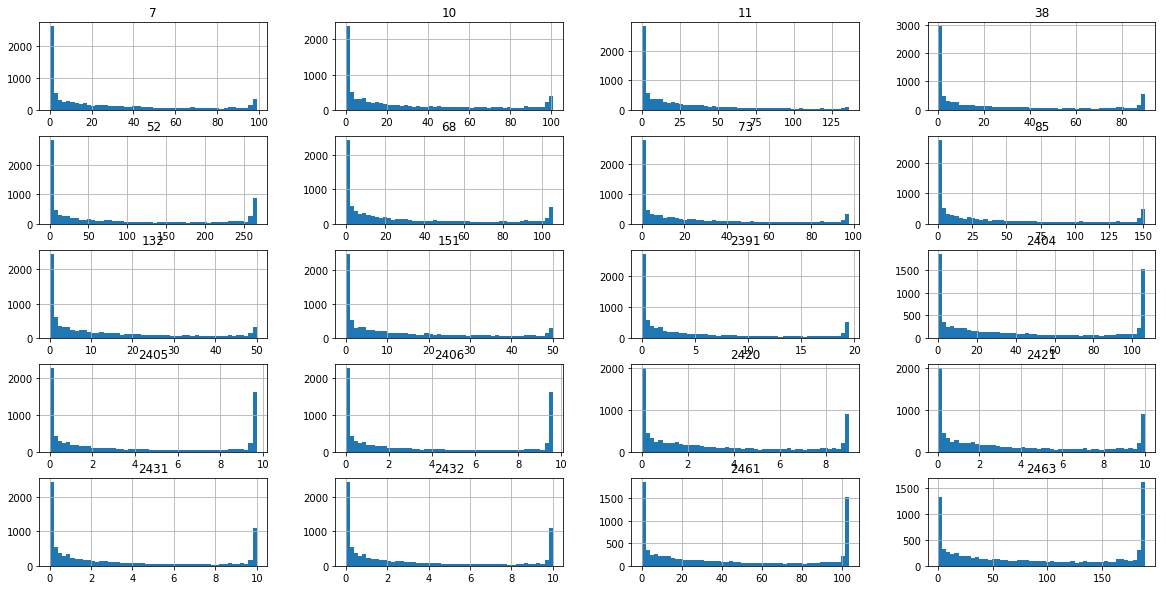

In [181]:
wecc.wind_data_2016[[7,10,11,38,52,68,73,85,132,151,2391,2404,2405,2406,2420,2421,2431,2432,2461,2463]].hist(bins = 50, figsize=[20,10])

In [182]:
wecc.solar_data_2016.columns

Int64Index([  51,   57,   58,   61,   62,   63,   64,   65,   66,   67,
            ...
            2124, 2125, 2126, 2285, 2286, 2287, 2288, 2363, 2364, 2484],
           dtype='int64', length=391)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDB995CB38>,
      dtype=object)

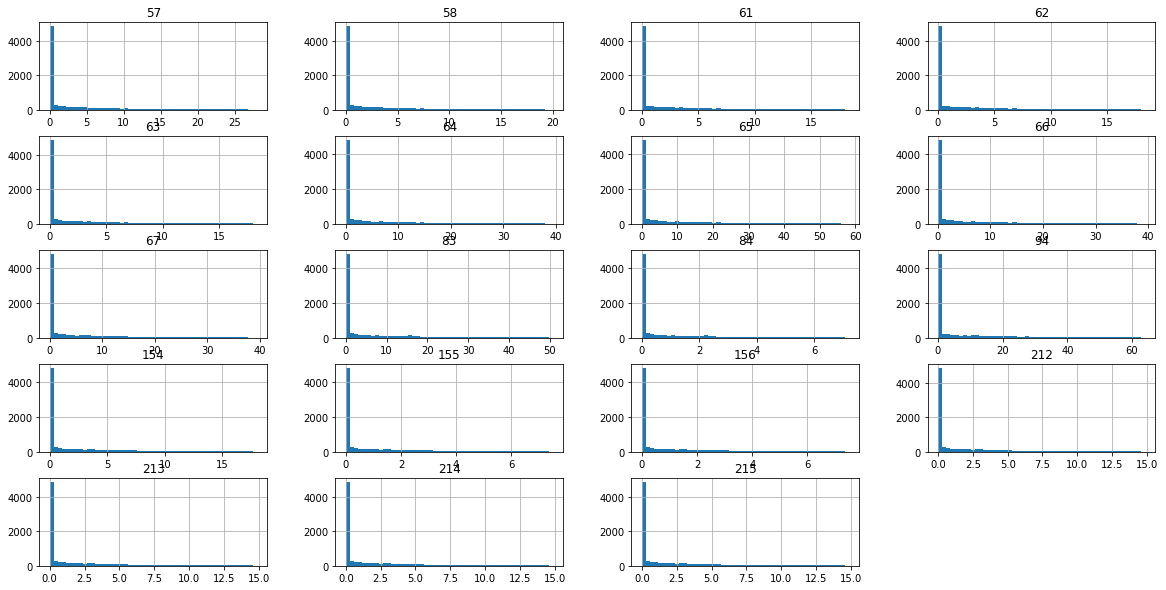

In [183]:
wecc.solar_data_2016[wecc.solar_data_2016.columns[1:20]].hist(bins = 50, figsize=[20,10])

In [184]:
type(counties)

dict

In [185]:
len(wecc.wind_data_2016.columns)

243

### Create ranked city-population file

In [232]:
#test on just CA cities first
citiesdir = 'U:\\src\\PostREISE\\postreise\\analyze\\TransmissionLineAnalysis\\'
cities = pd.read_csv(citiesdir + '/' + 'sub-est2017_all.csv', encoding='latin-1')

#cities.columns

In [233]:
cities.drop(columns = ['STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT',
       'PRIMGEO_FLAG', 'FUNCSTAT',  
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
       'POPESTIMATE2015',  'POPESTIMATE2017'], inplace=True)

min_city_population = 50000
city_filter = (cities.STNAME == 'California') \
                & (cities.NAME != 'California') \
                & ~(cities.NAME.str.contains('county', case = False)) \
                & (cities.POPESTIMATE2016 > min_city_population) \
                & (cities.SUMLEV == 162)

wecc_cities = cities.loc[city_filter].drop_duplicates()
numeric_cols = ['CENSUS2010POP','POPESTIMATE2016']
wecc_cities[numeric_cols] = wecc_cities[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
wecc_cities['Rank'] = wecc_cities['POPESTIMATE2016'].rank(ascending=False)
wecc_cities['pcChange'] = 100.*(wecc_cities['POPESTIMATE2016'] - wecc_cities['CENSUS2010POP'])/wecc_cities['CENSUS2010POP']
wecc_cities.drop(columns = 'SUMLEV', inplace=True)
wecc_cities['NAME'] = wecc_cities['NAME'].str.replace(' city','', case = True, regex=False)
wecc_cities['NAME'] = wecc_cities['NAME'].str.replace(' town','', case = True, regex=False)
wecc_cities = wecc_cities[['Rank','NAME', 'STNAME','POPESTIMATE2016','CENSUS2010POP', 'pcChange']]
wecc_cities.rename(columns = {'NAME':'Place name'})

,Rank,Place name,STNAME,POPESTIMATE2016,CENSUS2010POP,pcChange
2849,107.0,Alameda,California,79199.0,73812.0,7.298271
2851,96.0,Alhambra,California,85615.0,83089.0,3.040114
2852,176.0,Aliso Viejo,California,51490.0,47823.0,7.667859
2856,10.0,Anaheim,California,351661.0,336265.0,4.578532
2859,59.0,Antioch,California,111224.0,102372.0,8.646896
2860,119.0,Apple Valley,California,72426.0,69135.0,4.760252
2861,157.0,Arcadia,California,58570.0,56364.0,3.913846
2873,9.0,Bakersfield,California,376944.0,347483.0,8.478400
2874,113.0,Baldwin Park,California,76566.0,75390.0,1.559889
2879,110.0,Bellflower,California,77918.0,76616.0,1.699384


In [234]:
wecc_cities.head()

,Rank,NAME,STNAME,POPESTIMATE2016,CENSUS2010POP,pcChange
2849,107.0,Alameda,California,79199.0,73812.0,7.298271
2851,96.0,Alhambra,California,85615.0,83089.0,3.040114
2852,176.0,Aliso Viejo,California,51490.0,47823.0,7.667859
2856,10.0,Anaheim,California,351661.0,336265.0,4.578532
2859,59.0,Antioch,California,111224.0,102372.0,8.646896


In [235]:
wecc_cities.sort_values('Rank', ascending=True).to_csv(citiesdir + '/' + 'wecc_cities_2016.txt', sep='\t', index=False)

In [195]:
# Check Texas output
'''
min_city_population = 50000
city_filter = (cities.STNAME == 'Texas') \
                & (cities.NAME != 'Texas') \
                & ~(cities.NAME.str.contains('county', case = False)) \
                & (cities.POPESTIMATE2016 > min_city_population) \
                & (cities.SUMLEV == 162)

tx_cities = cities.loc[city_filter].drop_duplicates()
numeric_cols = ['CENSUS2010POP','POPESTIMATE2016']
tx_cities[numeric_cols] = tx_cities[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
tx_cities['Rank'] = tx_cities['POPESTIMATE2016'].rank(ascending=False)
tx_cities['pcChange'] = 100.*(tx_cities['POPESTIMATE2016'] - tx_cities['CENSUS2010POP'])/tx_cities['CENSUS2010POP']
tx_cities.drop(columns = 'SUMLEV', inplace=True)
tx_cities['NAME'] = tx_cities['NAME'].str.replace(' city','', case = True, regex=False)
tx_cities = tx_cities[['Rank','NAME', 'STNAME','POPESTIMATE2016','CENSUS2010POP', 'pcChange']]
tx_cities.rename(columns = {'NAME':'Place name'}, inplace=True)
tx_cities.sort_values('Rank', ascending=True).to_csv(citiesdir + '/' + 'tx_cities_2016.txt', sep='\t', index=False)
'''


### Version A 

In [191]:
# We check if the start and the end point of a line are in a city/county

In [228]:
# Check in which county/city a line is
gdf_nodes_start = gpd.GeoDataFrame(data={'x':wecc.branches['from_lon'], 'y':wecc.branches['from_lat']})
gdf_nodes_end = gpd.GeoDataFrame(data={'x':wecc.branches['to_lon'], 'y':wecc.branches['to_lat']})
# Load WECC cities, ranked by population
wecc_cities = pd.read_csv(citiesdir + '/' + 'wecc_cities_2016.txt',sep='\t')


In [229]:
wecc_cities.head()

,Rank,NAME,STNAME,POPESTIMATE2016,CENSUS2010POP,pcChange
0,1.0,Los Angeles,California,3981116.0,3792621.0,4.970046
1,2.0,San Diego,California,1406682.0,1307402.0,7.593686
2,117.0,Union City,California,75558.0,69516.0,8.691524
3,118.0,Turlock,California,72751.0,68549.0,6.129922
4,119.0,Apple Valley,California,72426.0,69135.0,4.760252


In [230]:
for index, row in wecc_cities.iterrows(): 
    place = row[1]
    gdf = ox.gdf_from_place({'city':place, 'state':'California'})
    print(gdf['place_name'])
    if (gdf.empty):
        print('not found')
    else:
        gdf_nodes_start.crs = gdf.crs
        gdf_nodes_start.name = 'nodes'
        gdf_nodes_start['geometry'] = gdf_nodes_start.apply(lambda row: Point((row['x'], row['y'])), axis=1)
        gdf_nodes_end.crs = gdf.crs
        gdf_nodes_end.name = 'nodes'
        gdf_nodes_end['geometry'] = gdf_nodes_end.apply(lambda row: Point((row['x'], row['y'])), axis=1)
        
        geometry = gdf['geometry'].iloc[0]
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])

        sindex_start = gdf_nodes_start.sindex
        possible_matches_index_start = list(sindex_start.intersection(geometry.bounds))
        possible_matches_start = gdf_nodes_start.iloc[possible_matches_index_start]
        precise_matches_start = possible_matches_start[possible_matches_start.intersects(geometry)]
        
        sindex_end = gdf_nodes_end.sindex
        possible_matches_index_end = list(sindex_end.intersection(geometry.bounds))
        possible_matches_end = gdf_nodes_end.iloc[possible_matches_index_end]
        precise_matches_end = possible_matches_end[possible_matches_end.intersects(geometry)]

        #intersect_index = precise_matches_start.index.intersection(precise_matches_end.index)
        wecc.branches.loc[precise_matches_start.index,'withinCityStart'] = place
        wecc.branches.loc[precise_matches_end.index,'withinCityEnd'] = place

0    LA, Los Angeles County, California, USA
Name: place_name, dtype: object
0    San Diego, San Diego County, California, USA
Name: place_name, dtype: object
0    Union City, Alameda County, California, USA
Name: place_name, dtype: object
0    Turlock, Stanislaus County, California, USA
Name: place_name, dtype: object
0    Apple Valley, San Bernardino County, Californi...
Name: place_name, dtype: object


In [236]:
wecc_county_list = list({county['name'] for code, county in counties.items() if county["state"] == "ca"})

In [237]:
wecc_county_list

['Alpine',
 'Santa Barbara',
 'Trinity',
 'Monterey',
 'Butte',
 'Sierra',
 'Kings',
 'San Joaquin',
 'Lake',
 'Contra Costa',
 'Amador',
 'Imperial',
 'Santa Clara',
 'Marin',
 'Glenn',
 'Humboldt',
 'Napa',
 'Modoc',
 'Madera',
 'Riverside',
 'Orange',
 'Ventura',
 'San Francisco',
 'San Bernardino',
 'Fresno',
 'Colusa',
 'Sutter',
 'Solano',
 'Nevada',
 'Merced',
 'Inyo',
 'Del Norte',
 'Yolo',
 'Mariposa',
 'Mendocino',
 'Los Angeles',
 'San Benito',
 'Placer',
 'Lassen',
 'San Luis Obispo',
 'Stanislaus',
 'San Diego',
 'Alameda',
 'San Mateo',
 'Siskiyou',
 'Tehama',
 'Santa Cruz',
 'Tuolumne',
 'Calaveras',
 'Kern',
 'Plumas',
 'El Dorado',
 'Sacramento',
 'Shasta',
 'Sonoma',
 'Mono',
 'Tulare',
 'Yuba']

In [238]:
for county in wecc_county_list:
    #print(county)
    gdf = ox.gdf_from_place({'county':county, 'state':'California'})
    print(gdf['place_name'])
    if (gdf.empty):
        print('not found')
    else:
        gdf_nodes_start.crs = gdf.crs
        gdf_nodes_start.name = 'nodes'
        gdf_nodes_start['geometry'] = gdf_nodes_start.apply(lambda row: Point((row['x'], row['y'])), axis=1)
        gdf_nodes_end.crs = gdf.crs
        gdf_nodes_end.name = 'nodes'
        gdf_nodes_end['geometry'] = gdf_nodes_end.apply(lambda row: Point((row['x'], row['y'])), axis=1)
        
        geometry = gdf['geometry'].iloc[0]
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])

        sindex_start = gdf_nodes_start.sindex
        possible_matches_index_start = list(sindex_start.intersection(geometry.bounds))
        possible_matches_start = gdf_nodes_start.iloc[possible_matches_index_start]
        precise_matches_start = possible_matches_start[possible_matches_start.intersects(geometry)]
        sindex_end = gdf_nodes_end.sindex
        possible_matches_index_end = list(sindex_end.intersection(geometry.bounds))
        possible_matches_end = gdf_nodes_end.iloc[possible_matches_index_end]
        precise_matches_end = possible_matches_end[possible_matches_end.intersects(geometry)]

        #intersect_index = precise_matches_start.index.intersection(precise_matches_end.index)
        wecc.branches.loc[precise_matches_start.index,'withinCountyStart'] = county
        wecc.branches.loc[precise_matches_end.index,'withinCountyEnd'] = county

0    Alpine County, California, USA
Name: place_name, dtype: object
0    Santa Barbara County, California, USA
Name: place_name, dtype: object
0    Trinity County, California, USA
Name: place_name, dtype: object
0    Monterey County, California, USA
Name: place_name, dtype: object
0    Butte County, California, USA
Name: place_name, dtype: object
0    Sierra County, California, USA
Name: place_name, dtype: object
0    Kings County, California, USA
Name: place_name, dtype: object
0    San Joaquin County, California, USA
Name: place_name, dtype: object
0    Lake County, California, USA
Name: place_name, dtype: object
0    Contra Costa County, California, USA
Name: place_name, dtype: object
0    Amador County, California, USA
Name: place_name, dtype: object
0    Imperial County, California, USA
Name: place_name, dtype: object
0    Santa Clara County, California, USA
Name: place_name, dtype: object
0    Marin County, California, USA
Name: place_name, dtype: object
0    Glenn County, Califo

In [ ]:
weatherZones = pd.read_csv(TX.data_loc + "ERCOTWeatherZones.csv")

In [ ]:
for zone in weatherZones.columns:
    wecc.branches.loc[wecc.branches['withinCountyStart'].isin(weatherZones[zone]),'withinZoneStart'] = zone
    wecc.branches.loc[wecc.branches['withinCountyEnd'].isin(weatherZones[zone]),'withinZoneEnd'] = zone

In [ ]:
wecc.branches.columns

In [ ]:
wecc.branches.to_csv('wecc_branchTest')

### Version B 

In [ ]:
# This version will categorize lines of dist=0 as not existant. That means when checking a line with zero distance the method 
# will return say that the line is not inside a shape. This is oposit to version A where we check the start and the endpoint
# location

In [ ]:
# This code writes the branches as LineStrings into geopandas. These objects can be used to figure out geometrical relations
from_bus = wecc.branches[['from_lon','from_lat']].values.tolist()
to_bus = wecc.branches[['to_lon','to_lat']].values.tolist()
[fbx,fby] =zip(*from_bus)
[tbx,tby] =zip(*to_bus)
from_zip = zip(fbx,fby)
to_zip = zip(tbx,tby)
wecc_MultiLines = MultiLineString(list(zip(from_zip,to_zip)))
wecc_lines = gpd.GeoSeries(data = wecc_MultiLines)

In [ ]:
for index, row in wecc_cities.iterrows():
    place = row[1]
    print(place)
    gdf = ox.gdf_from_place(place + ', Texas, USA')
    if (gdf.empty):
        print('not found')
    else:
        wecc.branches.loc[wecc_lines.apply(gdf.contains)[0],'withinCity'] = place

In [ ]:
wecc.branches[wecc.branches['withinCity'] != 'none'].size

In [ ]:
wecc.branches['withinCounty'].unique().size

In [ ]:
len(wecc_county_list)